In [1]:
import libpypack
from libpypack.locations import map_locations
from libpypack.visualization import generate_maps
from libpypack.visualization import heatmap
from libpypack.visualization import choropleth

import gmplot
import docker
import requests
import tarfile
import os
import geopandas

Using TensorFlow backend.


In [2]:
tweet_df = map_locations.locations_df("/Users/thatcher/Documents/GraduateSchool/Thesis/FORKS/PyPACK/test_data/2018_10_08_04_location.csv")

/Users/thatcher/anaconda3/envs/datavis/lib/python3.7/site-packages/tqdm/std.py:658: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel
100%|██████████| 9105/9105 [11:11<00:00, 13.56it/s]


NameError: name 'loc_gdf' is not defined

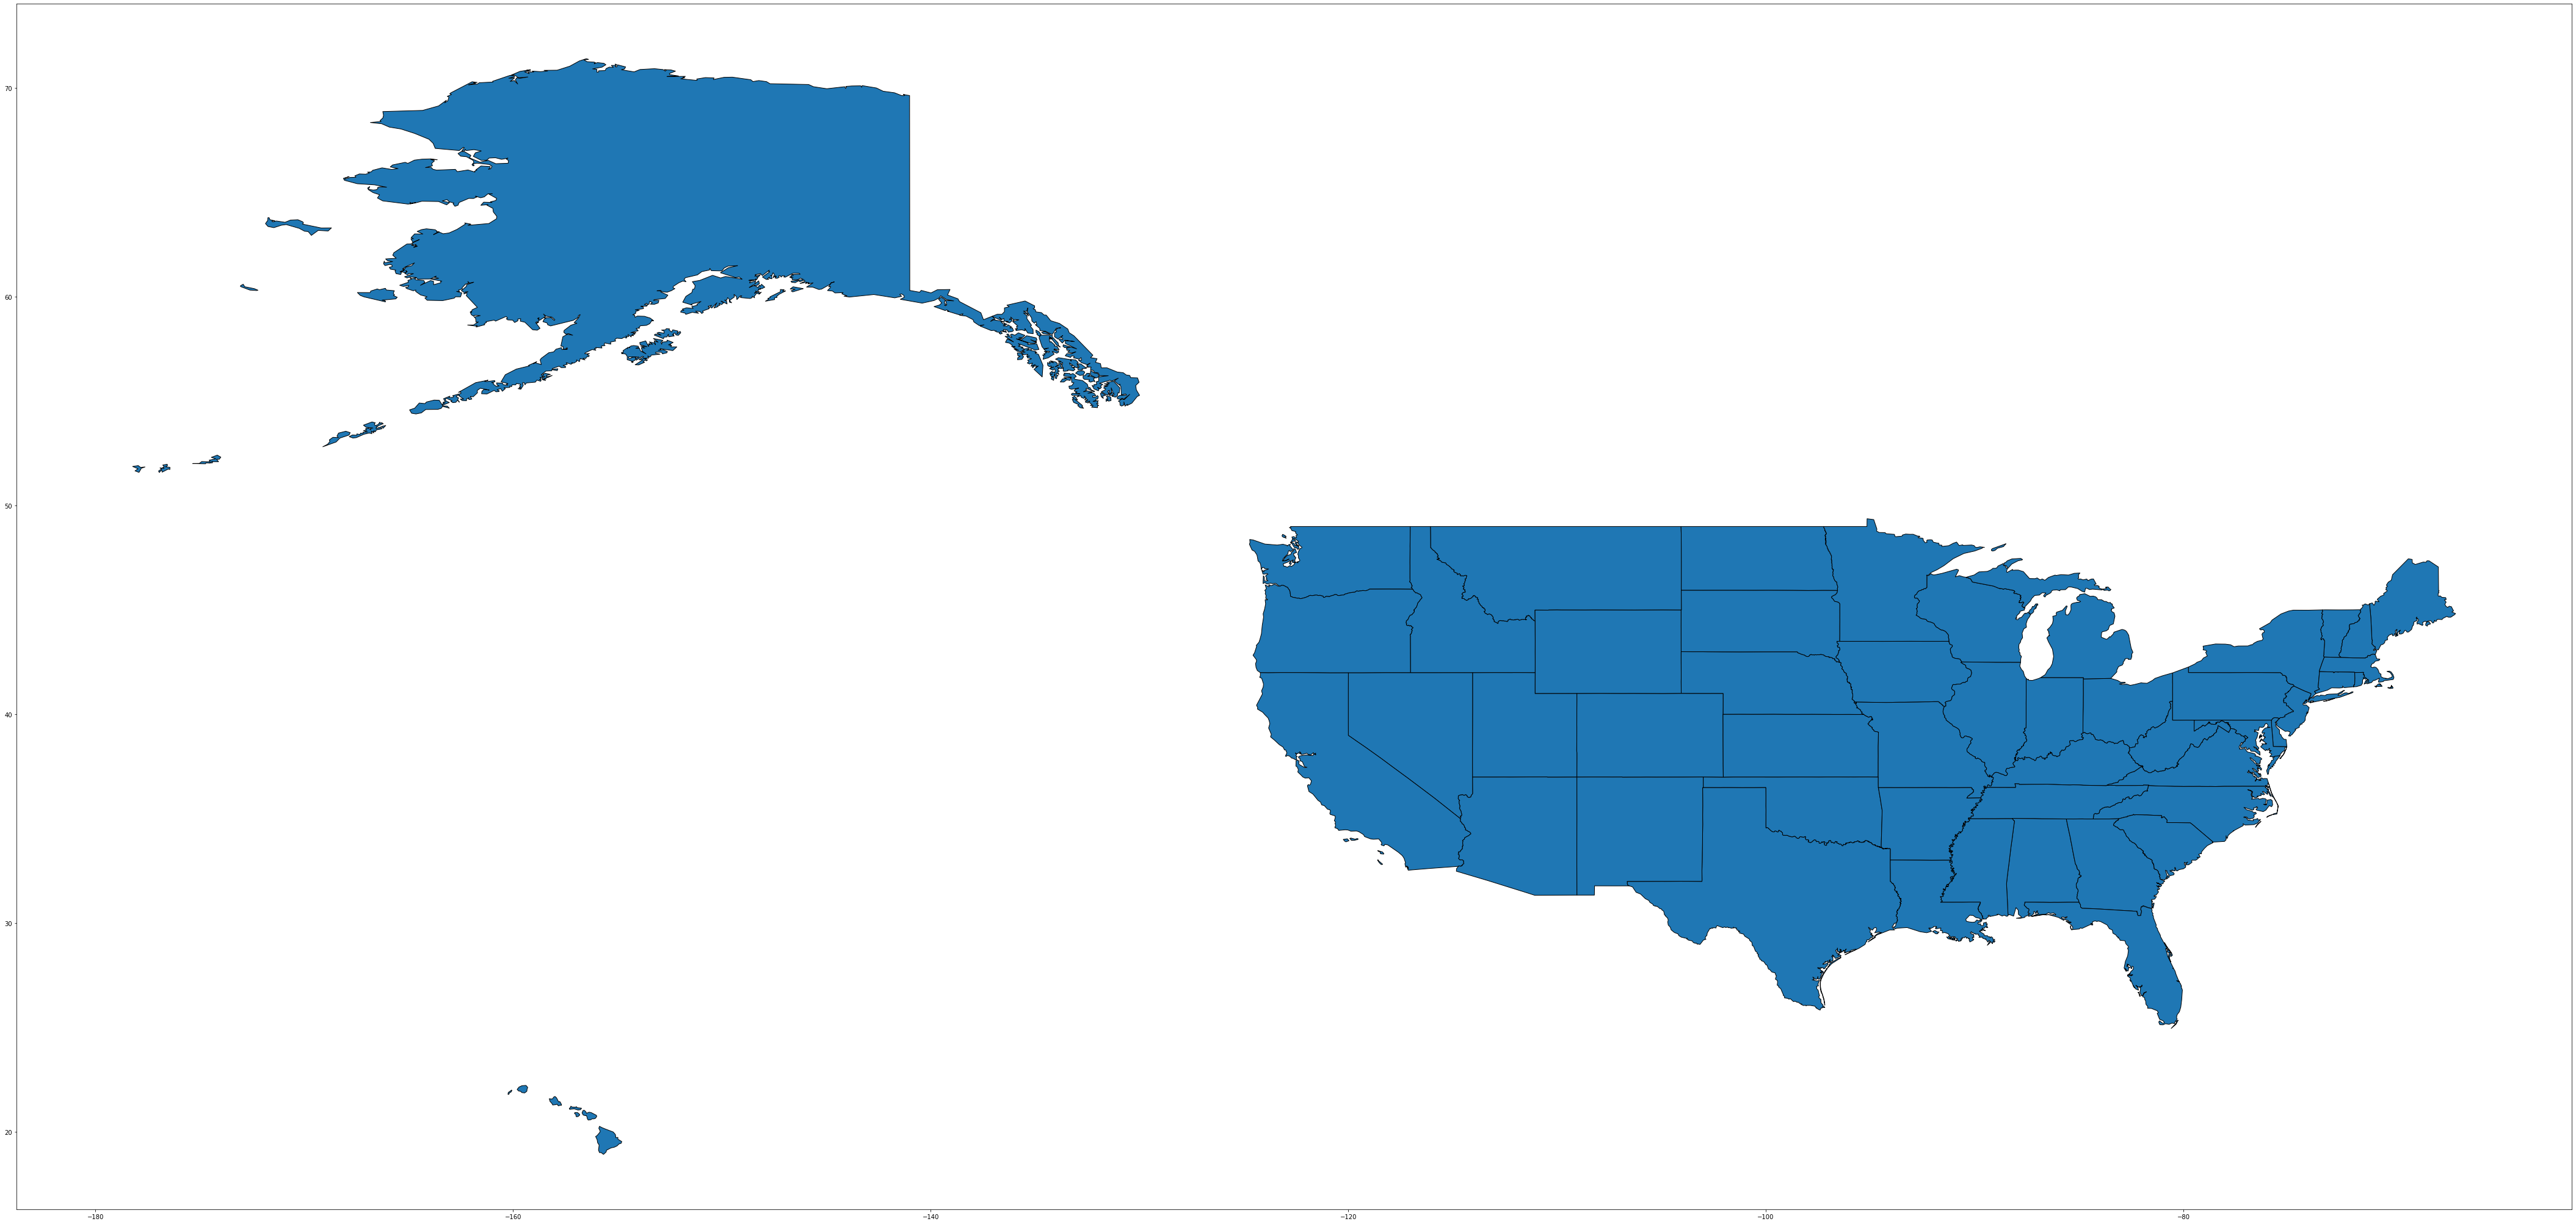

In [3]:
over_gdf = generate_maps.generate_overlay_gdf(tweet_df, filename="/Users/thatcher/Documents/GraduateSchool/Thesis/FORKS/PyPACK/libpypack/examples/states_21basic/states.shp")
generate_maps.plot_gdf(over_gdf)

In [ ]:
loc_gdf = generate_maps.get_loc_gdf(tweet_df)

In [ ]:
heatmap.heatmap(loc_gdf)

In [ ]:
choropleth.choropleth_map(loc_gdf, shp_path="/Users/thatcher/Documents/GraduateSchool/Thesis/FORKS/PyPACK/libpypack/examples/states_21basic/states.shp")